In [62]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz


In [63]:
df = pd.read_csv("/content/Book10.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


In [64]:
concept_hierarchy = {
    'never': 1,
    'No Info': 2,
    'current': 3,
    'ever':4,
    'former':5,
    'not current':6
}

df['smoking_history_hierarchy'] = df["smoking_history"].map(concept_hierarchy)
concept_hierarchy = {
    'Female': 1,
    'Male':0
    
}
df['gender_2'] = df["gender"].map(concept_hierarchy)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_hierarchy,gender_2
0,Female,80,0,1,never,25.19,6.6,140,0,1,1
1,Female,54,0,0,No Info,27.32,6.6,80,0,2,1
2,Male,28,0,0,never,27.32,5.7,158,0,1,0
3,Female,36,0,0,current,23.45,5.0,155,0,3,1
4,Male,76,1,1,current,20.14,4.8,155,0,3,0


In [65]:
feature_cols = ['heart_disease', 'bmi','blood_glucose_level', 'age','hypertension','HbA1c_level','gender_2','smoking_history_hierarchy']
X = df[feature_cols] # Features
y = df.diabetes

In [66]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # 70% training and 30% test


In [67]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


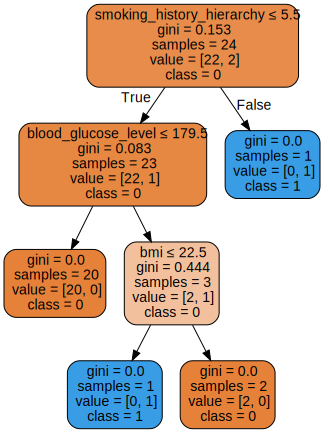

In [68]:
accuracy = accuracy_score(y_test, y_pred)
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph
